In [6]:
import os
import h5py
import sklearn.datasets
import pandas as pd
import numpy as np
from Bio import SeqIO
from utils.general import LOCALIZATION
import seaborn as sns
from tqdm import tqdm
import umap
import matplotlib.pyplot as plt

In [7]:
embeddings_file = h5py.File(os.path.join('data/embeddings', 'test_T5_reduced.h5'), 'r')
embeddings = []
labels = []
for record in tqdm(SeqIO.parse(open('data/fasta_files/test_as_per_deeploc.fasta'), 'fasta')):
    if len(record.seq) < 13000:
        embeddings.append(embeddings_file[str(record.description)][:])

        localization = record.description.split(' ')[1].split('-')[0]
        labels.append(localization)# get localization as integer
    else:
        print(record.description)
embeddings = np.array(embeddings)
labels = np.array(labels)


2768it [00:00, 3183.35it/s]


In [8]:
mapper = umap.UMAP().fit(embeddings)

(-2.789651393890381, 13.21034860610962)

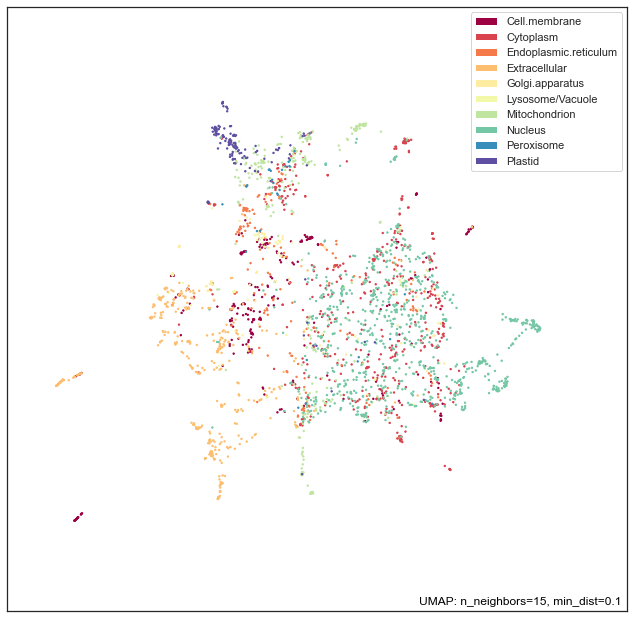

In [9]:
results = mapper.embedding_
mean = np.array(results).mean(axis=0)
import umap.plot
umap.plot.points(mapper, labels=labels)
range = 8

plt.xlim((mean[0]-range,mean[0]+range ))
plt.ylim((mean[1]-range,mean[1]+range ))


(-1.7896513938903809, 12.21034860610962)

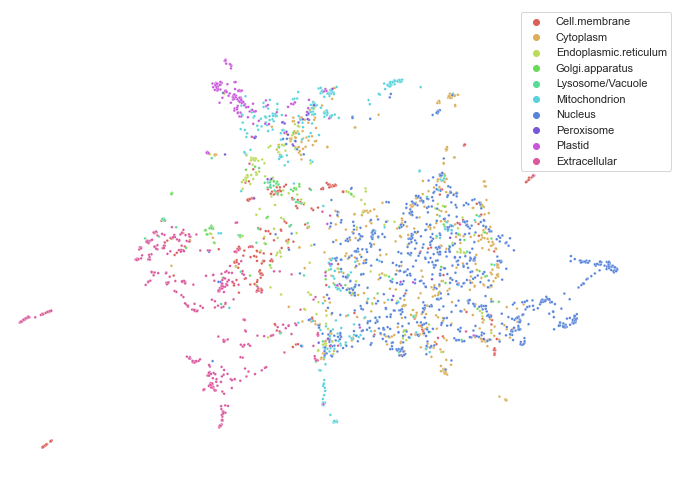

In [10]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("white")
results = mapper.embedding_
int_labels = []
for label in labels:
    int_labels.append(LOCALIZATION.index(label))
sns.scatterplot(x= results[:, 0], y=results[:, 1], hue=labels, palette='hls',alpha=1, s=7)
#plt.scatter(
#    results[:, 0],
#    results[:, 1],
#    s=12,
#    c=[sns.color_palette()[x] for x in int_labels])

range = 7
plt.axis('off')

plt.xlim((mean[0]-range,mean[0]+range ))
plt.ylim((mean[1]-range,mean[1]+range ))